# Goals of This Notebook

In [1]:
# investigate what affects a persons salary based on the Kaggle dataset 'adult.cvs'

# dataset source: 
# https://www.kaggle.com/wenruliu/adult-income-dataset
# this data set was taken on 05/19/96 from the US Census Bureau

# Audience / Problem Statement:
# If you are a high school student looking to invest in your future, which area's should you
# focus on to ensure a yearly salary higher than $50k?

In [2]:
cd

/Users/jjobes


In [3]:
cd /Users/jjobes/Desktop/Springboard/Data_Storytelling

/Users/jjobes/Desktop/Springboard/Data_Storytelling


In [4]:
ls

Storytelling Presentation.pptx  adult.csv


In [5]:
import pandas as pd

df = pd.read_csv('adult.csv')

In [6]:
print(df.shape)

df.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Investigate Data

In [7]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print(' ')

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
 
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
 
fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
131379     1
160061     1
334224     1
45381      1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64
 
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name:

# Age vs Salary

In [9]:
import matplotlib.pyplot as plt

def graphs_per_salary(feature):
    above_df = df[df['income'] == '>50K']
    below_df = df[df['income'] == '<=50K']

    above_50k = above_df[feature]
    below_50k = below_df[feature]
    
    plt.style.use('seaborn-deep')

    plt.hist([above_50k, below_50k], label=['Above $50k', 'Below $50k'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(loc='upper right')
    plt.xticks(rotation=90)
    plt.show()


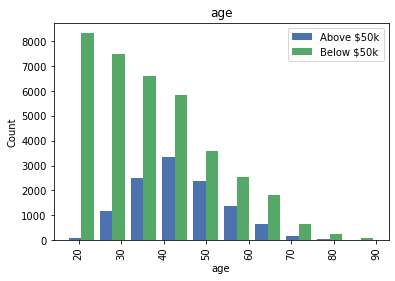

In [10]:
graphs_per_salary('age')

In [11]:
# people making above $50k peaks around 35-55 years old (normal-ish distribution)

# people making below $50k is is a linear relationship peaking early and dimishing as 
# age gets higher

In [12]:
above_df = df[df['income'] == '>50K']
below_df = df[df['income'] == '<=50K']

print('Above $50k:')
print(len(above_df))
print(len(above_df)/len(df))

print('Below $50k:')
print(len(below_df))
print(len(below_df)/len(df))

Above $50k:
11687
0.23928176569346055
Below $50k:
37155
0.7607182343065395


In [13]:
# 76% of the people in this dataset make below $50k

In [14]:
import numpy as np

def ratio_per_unique_feature_scatter(feature):

    above_df = df[df['income'] == '>50K']
    below_df = df[df['income'] == '<=50K']

    ratios = []
    feature_var = []

    for i in list(df[feature].unique()):
    
        feature_var.append(i)
        
        np.seterr(divide='ignore')
        ratio = len(above_df[above_df[feature] == i]) / len(below_df[below_df[feature]==i])
        ratios.append(ratio)
    
    feature_vs_pay_df = pd.DataFrame(zip(feature_var, ratios), columns =[feature, 'Above/Below $50k Ratio'])
    feature_vs_pay_df.sort_values(by=['Above/Below $50k Ratio'], inplace=True, ascending=False)

    plt.scatter(feature_vs_pay_df[feature], feature_vs_pay_df['Above/Below $50k Ratio'])
    plt.xticks(rotation=90)
    plt.ylabel('Above/Below $50k Ratio')
    plt.title('Least Variation in Pay per Feature')
    plt.xlabel(feature)

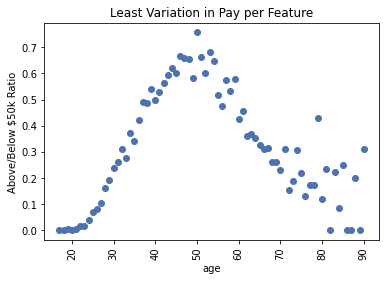

In [15]:
ratio_per_unique_feature_scatter('age')

In [16]:
# main age takeaways:
# people have the best chance to make the most around 50 years old
# don't be discouraged by lack of pay early on!

# Occupation vs Salary

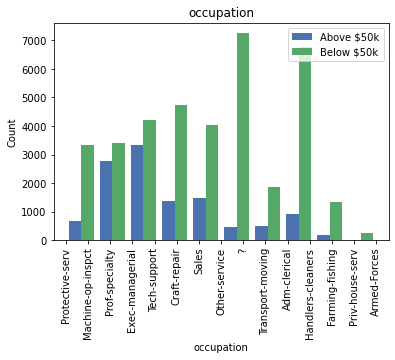

In [17]:
graphs_per_salary('occupation')

In [18]:
# some occupations show a wide range of pay (large number of less than $50k)
# lets look at the ratio of above $50k vs below $50k per job to define this


In [19]:
list(df['occupation'].unique())

['Machine-op-inspct',
 'Farming-fishing',
 'Protective-serv',
 '?',
 'Other-service',
 'Prof-specialty',
 'Craft-repair',
 'Adm-clerical',
 'Exec-managerial',
 'Tech-support',
 'Sales',
 'Priv-house-serv',
 'Transport-moving',
 'Handlers-cleaners',
 'Armed-Forces']

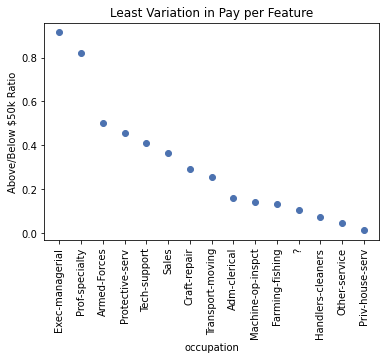

In [20]:
ratio_per_unique_feature_scatter('occupation')

In [21]:
# this chart shows which occupations have the best chance of making more than $50k
#     Exec-managerial
#     Prof-specialty

# all other occupations have less than a 50% chance of making more than $50k


# Schooling vs Salary

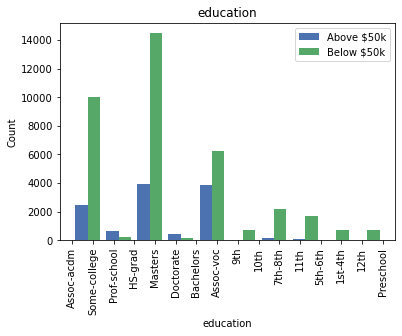

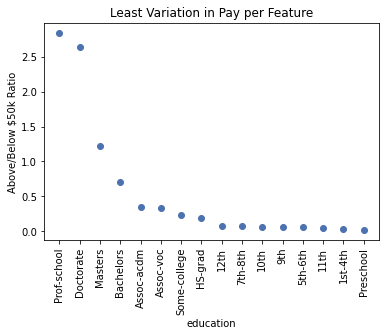

In [22]:
graphs_per_salary('education')
ratio_per_unique_feature_scatter('education')

In [23]:
# this clearly shows the difference in pay varies less with more schooling

# associates degree and below is likely not better than just getting industry experience

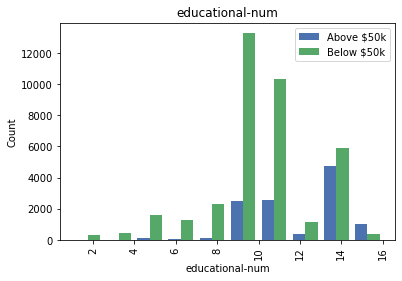

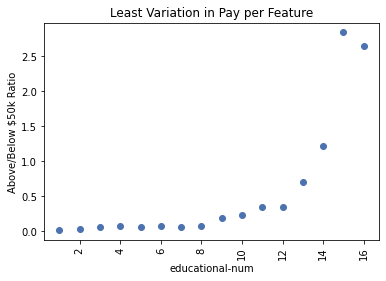

In [24]:
graphs_per_salary('educational-num')
ratio_per_unique_feature_scatter('educational-num')

In [25]:
# this again clearly shows the difference in pay vs years in school


# Marriage Status vs Salary

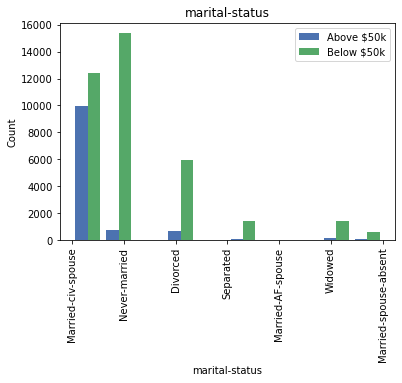

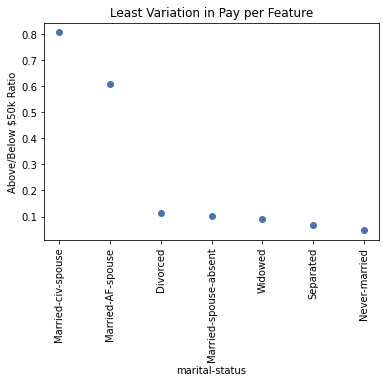

In [26]:
graphs_per_salary('marital-status')
ratio_per_unique_feature_scatter('marital-status')

In [27]:
# most people making above $50k are married!

# Race Trends

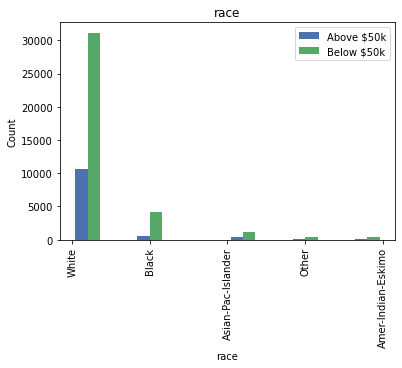

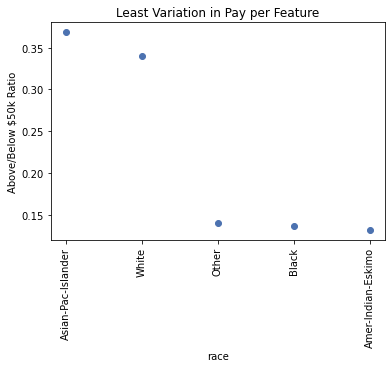

In [28]:
graphs_per_salary('race')
ratio_per_unique_feature_scatter('race')

In [29]:
# most people making above $50k are white

# There is much less varation in Asian/Pacific/Islander and White persons 
# vs 
# Other, black, and american indian/eskino

# Gender vs Salary

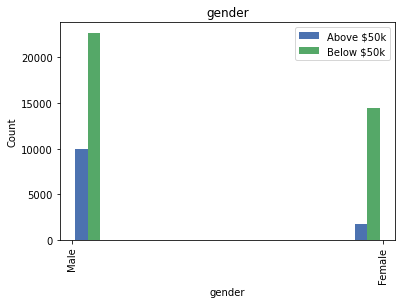

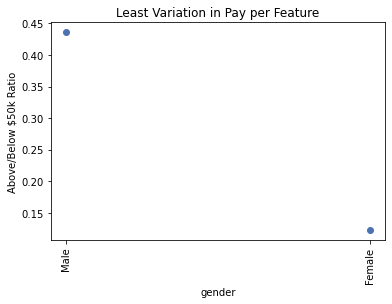

In [30]:
graphs_per_salary('gender')
ratio_per_unique_feature_scatter('gender')

In [31]:
# Males are almost 50/50 above $50k

# Only 15% of females make more than $50k

# Weekly Hours vs Salary

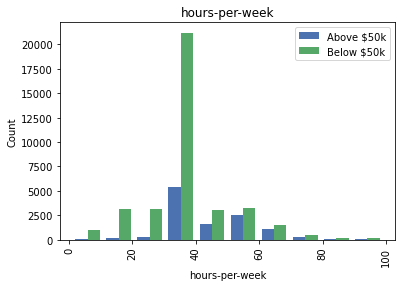

In [32]:
graphs_per_salary('hours-per-week')

In [33]:
# there is little correlation here. There is a range of salaries for every hour worked

# high peak at 40 hours for under $50k maybe due to minium wage

# Native Country vs Salary

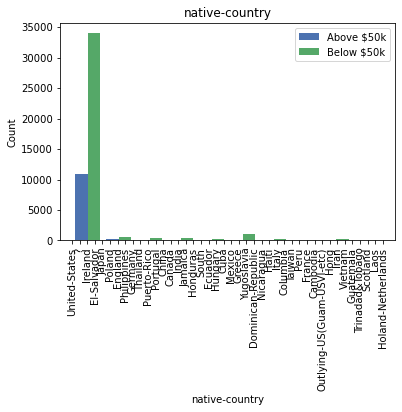

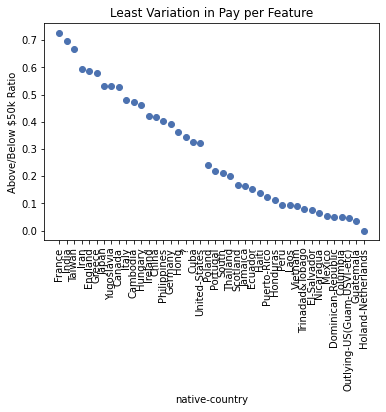

In [34]:
graphs_per_salary('native-country')
ratio_per_unique_feature_scatter('native-country')

In [35]:
# there is a large difference in people earning more vs less than $50k per year 
# depending on which country people are from


# Work Class vs Salary

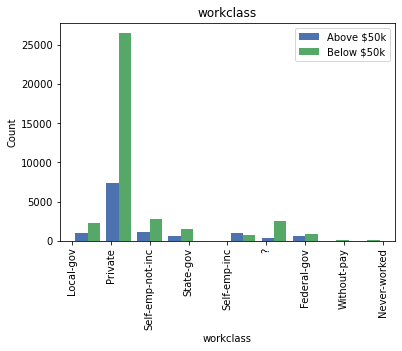

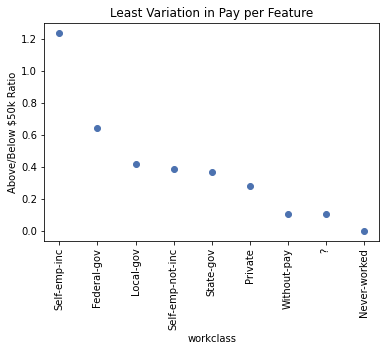

In [36]:
graphs_per_salary('workclass')
ratio_per_unique_feature_scatter('workclass')

# Conclusions

In [37]:
# Audience / Problem Statement:
# If you are a high school student looking to invest in your future, which area's should you
# focus on to ensure a yearly salary higher than $50k?

# age:
# people have the best chance to make the most around 50 years old
# don't be discouraged by lack of pay early on!

# occupation:
# focus on mangement and/or a specialization on a high demand field
#     Exec-managerial
#     Prof-specialty

# class:
# focus on starting your own business. The private sector has a large varation of pay!

#schooling:
# persue at least a bachleors degree in college. Ideally a masters or PhD
# there is little benefit from getting an assiciates degree

# advice depeding on personal information
# if you are a female, non-white or asian-islander, and single you are at a disadvantage
# based off this dataset. Overcome this by getting a higher degree and staying in school
# longer!

# work hours per week:
# work smarter not harder. There is little advantage to working more hours!
# working 40-60 hours per week is the sweet spot to have a greater chance of making more
# than $50k.
